# IDASH 2022 - Model Training - Unencrypted Data

## Import packages and define local functions

In [1]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [2]:
# Get current working directory
cwd = os.getcwd()

### Genotype data

In [3]:
genotype_df = (
    pd.read_csv(os.path.join(cwd, "CHALLENGE_DATA", "genotypes.txt.gz"),
                header=None,
                delimiter="\t")
)

genotype_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2994,2995,2996,2997,2998,2999,3000,3001,3002,3003
0,1,91514,91515,rs376723915_A_C_0.426717,0,1,0,2,0,0,...,0,1,1,0,2,2,1,2,0,1
1,1,546801,546802,rs113633859_G_C_0.323283,0,0,0,0,2,0,...,1,1,0,1,2,0,0,0,0,1
2,1,568708,568709,rs148329687_A_G_0.189497,1,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,1,714018,714019,rs114983708_A_G_0.138379,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,743020,743021,rs3964475_T_C_0.107428,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
genotype_df.shape

(20390, 3004)

### Phenotype data

In [5]:
phenotype_datasets_ct = 5

for i in range(phenotype_datasets_ct):
    exec(f"phenotype_{i+1}_df = pd.read_fwf(os.path.join(cwd, 'CHALLENGE_DATA', 'phenotypes_{i+1}.txt'), header=None, columns=['id','phenotype_{i+1}'])")
    exec(f"phenotype_{i+1}_df.set_axis(['id', 'phenotype_{i+1}'], axis='columns', inplace=True)")
    
    if i == 0:
        all_phenotype_df = phenotype_1_df
    else:
        exec(f"all_phenotype_df = all_phenotype_df.merge(phenotype_{i+1}_df, on='id')")
        
all_phenotype_df.head()

,id,phenotype_1,phenotype_2,phenotype_3,phenotype_4,phenotype_5
0,4a4bb6530b53abe6fa331dc672aba6bb10cab470,-0.043713,0.038958,0.063996,1,1
1,763b70205b1dae15e84f14279072a54fa06e6f49,-0.177478,0.186247,0.437471,1,0
2,01c7487875a212d335951ccdc3977229dcfc0eb2,-0.065992,-0.305971,0.314094,1,0
3,ccbc468dbcb1a6a7fa12092eae590d4fd60c6dbe,-0.071819,-0.159683,0.569707,0,1
4,0f9f7366c87e9f155e0d26bad3fbab3735d70590,0.035178,-0.312284,0.116783,1,0


In [6]:
all_phenotype_df.shape

(3000, 6)

### Sample IDs

In [7]:
sample_id_df = (
    pd.read_csv(os.path.join(cwd, "CHALLENGE_DATA", "genotype_sample_ids.list"),
                header=None)
)

sample_id_df.columns = ["id"]

sample_id_df.head()

,id
0,d8e4f50989cf4f4142627b2e01dde505eafe0cad
1,4d784bfc402f201b78efb2404ed7c8b9ebf2126a
2,81b832a049175854a6054c729e403e43bfb11bc6
3,f5edd61883f0e8b42a7cc77757419b4161c4aa9a
4,ccf1a224f9e5e3c4780dac429691b56593b723b3


In [8]:
sample_id_df.shape

(3000, 1)

In [9]:
sample_id_list = list(sample_id_df["id"])
sample_id_list[:10]

['d8e4f50989cf4f4142627b2e01dde505eafe0cad',
 '4d784bfc402f201b78efb2404ed7c8b9ebf2126a',
 '81b832a049175854a6054c729e403e43bfb11bc6',
 'f5edd61883f0e8b42a7cc77757419b4161c4aa9a',
 'ccf1a224f9e5e3c4780dac429691b56593b723b3',
 '40b14a5b660779d63984fdbbb4d6f46adff61e2d',
 'ec7a2a6acf842f4d8d35025c01596ca8f38840e8',
 '6f743b93744fd311ac6e8c0695ca8f4d427ec8b2',
 '6bf77562da2f6d0a0be7c1f89fa62c6ba89ddf3d',
 '8d74d186c4d476288158289e449f759d3d4d27bc']

## Prepare data

In [10]:
# Drop first 4 extraneous columns of the genotype dataframe
res_genotype_df = genotype_df.iloc[: , 4:]
res_genotype_df.head()

# Transpose res_genotype_df
res_genotype_df_T = res_genotype_df.T

# Reset and drop index
res_genotype_df_T.reset_index(inplace=True, drop=True)

# Attach sample IDs
sample_id_res_genotype_df_T = (
    sample_id_df
    .merge(res_genotype_df_T, left_index=True, right_index=True)
)

# Attach phenotypes
phenotype_sample_id_res_genotype_df_T = (
    sample_id_res_genotype_df_T
    .merge(all_phenotype_df, on="id", how="inner")
)

# Define final dataset
geno_pheno_df = phenotype_sample_id_res_genotype_df_T
print(geno_pheno_df.shape)
geno_pheno_df.head()

(3000, 20396)


,id,0,1,2,3,4,5,6,7,8,...,20385,20386,20387,20388,20389,phenotype_1,phenotype_2,phenotype_3,phenotype_4,phenotype_5
0,d8e4f50989cf4f4142627b2e01dde505eafe0cad,0,0,1,0,0,2,0,0,1,...,0,1,1,1,2,0.023975,0.277299,-0.775620,1,0
1,4d784bfc402f201b78efb2404ed7c8b9ebf2126a,1,0,0,0,0,0,2,0,0,...,0,0,0,0,0,-0.091981,-0.051629,-0.564953,1,0
2,81b832a049175854a6054c729e403e43bfb11bc6,0,0,2,1,0,1,1,0,0,...,0,2,1,2,1,-0.058663,-0.184121,-0.724430,1,0
3,f5edd61883f0e8b42a7cc77757419b4161c4aa9a,2,0,0,0,1,0,2,0,0,...,1,1,1,1,1,-0.007388,-0.220403,-0.176628,1,0
4,ccf1a224f9e5e3c4780dac429691b56593b723b3,0,2,0,0,0,0,2,0,0,...,0,1,1,1,1,-0.082941,-0.226222,-0.312832,0,0


## Modeling Experiments

Competition entries will be judged on Normalized RMSE.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_auc_score

In [26]:
def getModelResults(actuals, predictions):
    """
    This function returns and displays the model results.
    
    Args:
        actuals        (pandas dataframe): A single column of the actual values
        predictions            (np array): A model's prediction values
    
    Returns:
        model_rmse                (float): The model's rmse on the test set
        fig
        ax
    """
    # Compute the model_rmse
    model_mse = metrics.mean_squared_error(actuals, predictions)
    model_rmse = np.round(np.sqrt(model_mse), 6)
    
    # Build a plot
    fig, ax = plt.subplots()
    ax.scatter(actuals, predictions)
    ax.set_title("Model results")
    ax.set_xlabel("Actuals")
    ax.set_ylabel("Predictions")
    
    return model_rmse, fig, ax

In [46]:
def getBinaryModelResults(actuals, predictions):
    """
    This function returns and displays the binary classifier model results.
    
    Args:
        actuals        (pandas dataframe): A single column of the actual values
        predictions            (np array): A model's prediction values
    
    Returns:
        model_auc                (float): The model's roc_auc_score on the test set
        model_roc_auc_score
        model_classification_report
        model_confusion_matrix
        
    """
    # Compute the model performance metrics
    model_auc = metrics.auc(actuals, predictions)
    model_roc_auc_score = metrics.roc_auc_score(actuals, predictions)
    model_classification_report = metrics.classification_report(actuals, predictions)
    model_confusion_matrix = metrics.confusion_matrix(actuals, predictions)
    
    return model_auc, model_roc_auc_score, model_classification_report, model_confusion_matrix

In [16]:
# Set targets
y = geno_pheno_df[[f"phenotype_{i+1}" for i in range(5)]]
y1 = geno_pheno_df[["phenotype_1"]]
y2 = geno_pheno_df[["phenotype_2"]]
y3 = geno_pheno_df[["phenotype_3"]]
y4 = geno_pheno_df[["phenotype_4"]]
y5 = geno_pheno_df[["phenotype_5"]]

# Set features
X = geno_pheno_df.iloc[:, 1:-5]

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20380,20381,20382,20383,20384,20385,20386,20387,20388,20389
0,0,0,1,0,0,2,0,0,1,0,...,0,1,1,1,0,0,1,1,1,2
1,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,1,0,1,1,0,0,0,...,0,2,2,1,0,0,2,1,2,1
3,2,0,0,0,1,0,2,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,2,0,0,0,0,2,0,0,1,...,1,1,1,1,0,0,1,1,1,1


In [17]:
y.head()

,phenotype_1,phenotype_2,phenotype_3,phenotype_4,phenotype_5
0,0.023975,0.277299,-0.775620,1,0
1,-0.091981,-0.051629,-0.564953,1,0
2,-0.058663,-0.184121,-0.724430,1,0
3,-0.007388,-0.220403,-0.176628,1,0
4,-0.082941,-0.226222,-0.312832,0,0


In [18]:
y2.head()

,phenotype_2
0,0.277299
1,-0.051629
2,-0.184121
3,-0.220403
4,-0.226222


In [38]:
y4.groupby(["phenotype_4"])["phenotype_4"].count()

phenotype_4
0    1145
1    1855
Name: phenotype_4, dtype: int64

In [40]:
y5.groupby(["phenotype_5"])["phenotype_5"].count()

phenotype_5
0    1451
1    1549
Name: phenotype_5, dtype: int64

### Train-Test split

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.3, random_state=42)
)

# Phenotype_i train sets
y1_train = y_train[["phenotype_1"]]
y2_train = y_train[["phenotype_2"]]
y3_train = y_train[["phenotype_3"]]
y4_train = y_train[["phenotype_4"]]
y5_train = y_train[["phenotype_5"]]

# Phenotype_i test sets
y1_test = y_test[["phenotype_1"]]
y2_test = y_test[["phenotype_2"]]
y3_test = y_test[["phenotype_3"]]
y4_test = y_test[["phenotype_4"]]
y5_test = y_test[["phenotype_5"]]

### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

Modeling for Phenotype 1...
RMSE: 0.058407
Modeling for Phenotype 2...


<string>:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


RMSE: 0.208897
Modeling for Phenotype 3...


<string>:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


RMSE: 0.34498


<string>:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


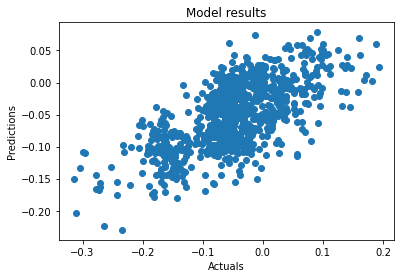

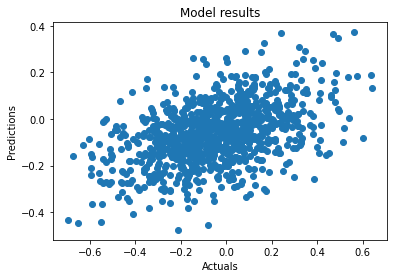

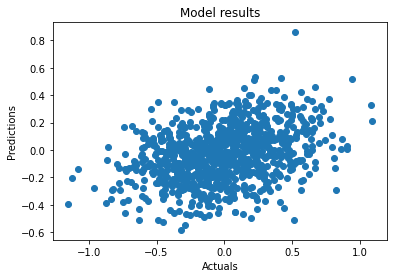

In [42]:
# Initialize dictionary to track scores
linreg_rmse_dict = dict()

# Initialize and fit LinearRegression models to non-binary phenotypes
for i in range(3):
    print(f"Modeling for Phenotype {i+1}...")
    exec(f"linreg{i+1} = LinearRegression()")
    exec(f"linreg{i+1}.fit(X_train, y{i+1}_train)")
    exec(f"linreg_predictions{i+1} = linreg{i+1}.predict(X_test)")
    exec(f"linreg{i+1}_rmse, linreg{i+1}_fig, linreg{i+1}_ax = getModelResults(y{i+1}_test, linreg_predictions{i+1})")
    exec(f"print('RMSE:', linreg{i+1}_rmse)")
#     exec(f"linreg_rmse_dict.update(\{'phenotype_{i+1}': linreg{i+1}_rmse)\})")
    exec(f"linreg{i+1}_fig.show()")
    print("="*40)

### Linear model with Lasso

In [28]:
from sklearn.linear_model import Lasso

Modeling for Phenotype 1...


/Users/jeff/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002796659701315068, tolerance: 0.0012437721913110596
  model = cd_fast.enet_coordinate_descent(
<string>:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


RMSE: 0.028004
Modeling for Phenotype 2...


/Users/jeff/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011617845618590243, tolerance: 0.011004620011599386
  model = cd_fast.enet_coordinate_descent(
<string>:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


RMSE: 0.061102
Modeling for Phenotype 3...
RMSE: 0.139028


<string>:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


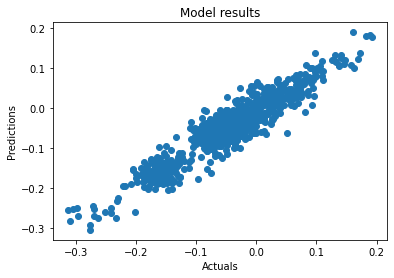

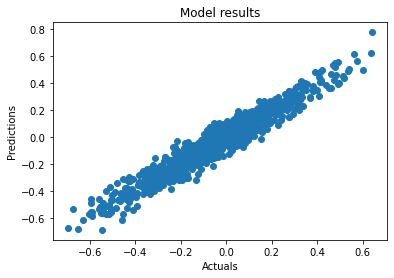

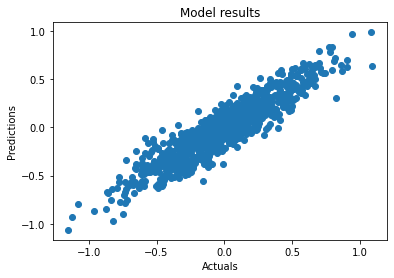

In [43]:
# Initialize dictionary to track scores
lasso_rmse_dict = dict()

# Initialize and fit Linear models with Lasso to non-binary phenotypes
for i in range(3):
    print(f"Modeling for Phenotype {i+1}...")
    exec(f"lasso_model{i+1} = Lasso(alpha=.000002, max_iter=5000)")
    exec(f"lasso_model{i+1}.fit(X_train, y{i+1}_train)")
    exec(f"lasso_model_predictions{i+1} = lasso_model{i+1}.predict(X_test)")
    exec(f"lasso_model{i+1}_rmse, lasso_model{i+1}_fig, lasso_model{i+1}_ax = getModelResults(y{i+1}_test, lasso_model_predictions{i+1})")
    exec(f"print('RMSE:', lasso_model{i+1}_rmse)")
#     exec(f"lasso_rmse_dict.update(\{'phenotype_{i+1}': lasso_model{i+1}_rmse\})")
    exec(f"lasso_model{i+1}_fig.show()")
    print("="*40)

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
# Initialize dictionary to track scores
randomforest_rmse_dict = dict()

# Initialize and fit RandomForest models to non-binary phenotypes
for i in range(3):
    print(f"Modeling for Phenotype {i+1}...")
    exec(f"randomforest{i+1} = RandomForestRegressor()")
    exec(f"randomforest{i+1}.fit(X_train, y{i+1}_train['phenotype_{i+1}'])")
    exec(f"randomforest_predictions{i+1} = randomforest{i+1}.predict(X_test)")
    exec(f"randomforest{i+1}_rmse, randomforest{i+1}_fig, randomforest{i+1}_ax = getModelResults(y{i+1}_test, randomforest_predictions{i+1})")
    exec(f"print('RMSE:', randomforest{i+1}_rmse)")
#     exec(f"randomforest_rmse_dict.update(\{'phenotype_{i+1}': randomforest{i+1}_rmse\})")
    exec(f"randomforest{i+1}_fig.show()")
    print("="*40)

Modeling for Phenotype 1...


KeyboardInterrupt: 

### GradientBoosted Trees

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
# Initialize dictionary to track scores
gradientboost_rmse_dict = dict()

# Initialize and fit RandomForest models to non-binary phenotypes
for i in range(3):
    print(f"Modeling for Phenotype {i+1}...")
    exec(f"gradientboost{i+1} = GradientBoostingRegressor()")
    exec(f"gradientboost{i+1}.fit(X_train, y{i+1}_train['phenotype_{i+1}'])")
    exec(f"gradientboost_predictions{i+1} = gradientboost{i+1}.predict(X_test)")
    exec(f"gradientboost{i+1}_rmse, gradientboost{i+1}_fig, gradientboost{i+1}_ax = getModelResults(y{i+1}_test, gradientboost_predictions{i+1})")
    exec(f"print('RMSE:', gradientboost{i+1}_rmse)")
#     exec(f"gradientboost_rmse_dict.update(\{'phenotype_{i+1}': gradientboost{i+1}_rmse\})")
    exec(f"gradientboost{i+1}_fig.show()")
    print("="*40)

Modeling for Phenotype 1...


KeyboardInterrupt: 

### PyTorch Neural Network

In [60]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [61]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
class MLP(nn.Module):
  """
  
  
  """
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(13, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [ ]:
  # Initialize the MLP
  mlp = MLP()
  
  # Define the loss function and optimizer
  loss_function = nn.L1Loss()
  optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
# Run the training loop
  for epoch in range(0, 5): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get and prepare inputs
      inputs, targets = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 10 == 0:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

  # Process is complete.
  print('Training process has finished.')

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [59]:
# # Initialize dictionary to track scores
# logreg_rmse_dict = dict()

# # Initialize and fit Linear models with Lasso to non-binary phenotypes
# for i in range(3, 5):
#     print(f"Modeling for Phenotype {i+1}...")
#     exec(f"logreg{i+1} = LogisticRegression()")
#     exec(f"logreg{i+1}.fit(X_train, y{i+1}_train)")
#     exec(f"logreg_predictions{i+1} = logreg{i+1}.predict(X_test)")
#     exec(f"logreg{i+1}_auc, logreg{i+1}_roc_auc_score, logreg{i+1}_classification_report, logreg{i+1}_confusion_matrix = getBinaryModelResults(y{i+1}_test, logreg_predictions{i+1})")
#     exec(f"print('AUC:', logreg{i+1}_auc)")
# #     exec(f"logreg_rmse_dict.update(\{'phenotype_{i+1}': logreg{i+1}_auc\})")
#     exec(f"logreg{i+1}_fig.show()")
# #     metrics.plot_roc_curve(logmodel,Z_test,y_test)
#     print("="*40)

# ======== OLD (from Dan) ==========

In [70]:
# Attempt Principal Component Analysis for dimension reduction of the data

from sklearn.decomposition import PCA

In [71]:
gt = np.array(Z)
gt

array([[0, 0, 1, ..., 1, 1, 2],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 1, 2, 1],
       ...,
       [2, 0, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 1, 2, 0],
       [1, 1, 0, ..., 0, 1, 1]], dtype=object)

In [72]:
# Try top 10 components

pca = PCA(n_components=10)
pca.fit(gt)

PCA(n_components=10)

In [73]:
# Percentage of variance explained.
# These values show PCA is unlikely to be effective, since the first 2 components 
# account for <20%, and all others are <.2% with slow dropoff.

print(pca.explained_variance_ratio_)

[0.11836603 0.0666383  0.00203222 0.0019368  0.0018498  0.00161179
 0.00146571 0.00138975 0.00135768 0.00132848]


In [74]:
print(pca.singular_values_)

[1713.12105079 1285.3945759   224.4707026   219.13764173  214.15915373
  199.90721216  190.63305035  185.62803119  183.47312857  181.48996975]


In [75]:
gt_reduced = pca.transform(gt)
gt_reduced

array([[ 42.91607578, -10.11405878,  -6.00936221, ...,   4.30939768,
          2.73533474,   2.34997744],
       [ -9.98524171,  32.09674492,  -5.75149616, ...,  -1.70348264,
          0.411401  ,   1.68435763],
       [ 41.76729167,  -9.16612148,  -1.94077685, ...,   2.52438407,
         -5.34997069,   0.85700053],
       ...,
       [-10.89214927,  32.44937692,  -5.92016067, ...,  -0.15663353,
         -3.90606901,   0.9483873 ],
       [ 41.85912557,  -9.75768124,  -2.48541321, ...,   1.5203539 ,
          1.4869588 ,  -0.19803369],
       [-11.21000858,  31.81990886,  -3.95077332, ...,  -0.3112157 ,
         -3.55037339,  -1.0668255 ]])

In [76]:
gt_reduced.shape

(3000, 10)

In [77]:
y = ph1_df.loc[sample_list]

In [78]:
# Try to train OLS linear model on projection to top 10 components.

X = gt_reduced

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [80]:
lm = LinearRegression()

In [81]:
lm.fit(X_train,y_train)

LinearRegression()

In [82]:
lm.coef_

array([[ 1.46983508e-04,  1.33124772e-03, -1.45054323e-04,
         1.77064903e-04, -2.76323187e-04, -5.95893879e-06,
        -1.51743390e-04, -9.67936231e-04,  4.49115355e-04,
         7.97761128e-04]])

In [83]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

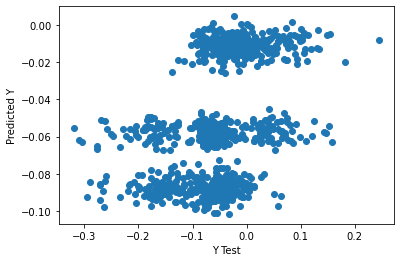

In [84]:
# Model does not perform well

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [85]:
#RMSE worse than OLS linear regression on full dataset

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.05529774726037647
MSE: 0.005215450614646801
RMSE: 0.07221807678584913


In [86]:
# Try same technique on top 10 components for Phenotype 2

y = ph2_df.loc[sample_list]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=103)

In [88]:
lm2 = LinearRegression()

In [89]:
lm2.fit(X_train,y_train)

LinearRegression()

In [90]:
lm2.coef_

array([[ 0.00091032,  0.00229815, -0.00351356,  0.00032136, -0.0011412 ,
         0.00012644,  0.00069429,  0.00083594, -0.00036104,  0.00053002]])

In [91]:
predictions2 = lm2.predict(X_test)

Text(0, 0.5, 'Predicted Y')

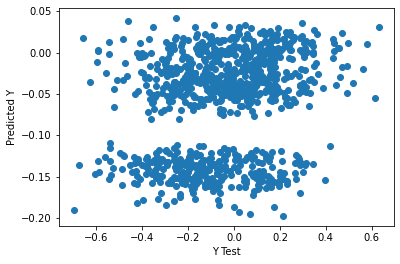

In [92]:
# Again, model performs poorly

plt.scatter(y_test,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# Try PCA with 50 components

pca50 = PCA(n_components=50)
pca50.fit(gt)

In [ ]:
print(pca50.explained_variance_ratio_)

In [ ]:
gt_reduced50 = pca50.transform(gt)
gt_reduced50

In [ ]:
y = ph2_df.loc[sample_list]
X = gt_reduced50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=103)

In [ ]:
lm2_50 = LinearRegression()

In [ ]:
lm2_50.fit(X_train,y_train)

In [ ]:
predictions2_50 = lm2_50.predictdict(X_test)

In [ ]:
plt.scatter(y_test,predictions2_50)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2_50))
print('MSE:', metrics.mean_squared_error(y_test, predictions2_50))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2_50)))

In [ ]:
# Set target and full set of data to predict Ph 1

y = ph1_df.loc[sample_list]
X = Z

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=102)

In [ ]:
# Lasso model with different alpha.
# Best performance found at alpha=.0005

lasso1 = Lasso(alpha = .0005, max_iter=10000)

In [ ]:
lasso1.fit(X_train,y_train)

In [ ]:
pred = lasso1.predict(X_test)

In [ ]:
# Is this graph correct?
# Do the data lie on planes defined by the model?
# Suggests not enough nonzero coefficients, but this model had best RMSE.

plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# Lasso with alpha=.0005 gets record for Ph 1 RMSE of .021

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
# Lasso with best performace only has 335 nonzero coefficients

np.count_nonzero(lasso1.coef_)

In [ ]:
# Lasso for Ph 2

y = ph2_df.loc[sample_list]
X = Z

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=103)

In [ ]:
lasso_model2 = Lasso(alpha=.000002,max_iter=6000)

In [ ]:
lasso_model2.fit(X_train,y_train)

In [ ]:
lasso_pred2 = lasso_model2.predict(X_test)

In [ ]:
plt.scatter(y_test,lasso_pred2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred2))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred2)))

In [ ]:
np.count_nonzero(lasso_model2.coef_)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=105)

In [ ]:
lasso2 = Lasso(alpha = .001, max_iter=10000)

In [ ]:
lasso2.fit(X_train,y_train)

In [ ]:
pred = lasso2.predict(X_test)

In [ ]:
# RMSE record for PH 2: .040
# Lasso with alpha = .001

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
np.count_nonzero(lasso2.coef_)

In [ ]:
# Try grid search for good parameters for Lasso to predict Ph 3

y = ph3_df
X=Z

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=104)

In [ ]:
param_grid = {'alpha': [.000002,.00002,.0002]} 

In [ ]:
grid = GridSearchCV(Lasso(max_iter=5000),param_grid,refit=True, verbose=4)

In [ ]:
# Takes a long time.

grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
plt.scatter(y_test,grid_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_pred))
print('MSE:', metrics.mean_squared_error(y_test, grid_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_pred)))

In [ ]:
# Faster to change alpha value by hand

y = ph3_df
X=Z

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=107)

In [ ]:
lasso3 = Lasso(alpha=.002,max_iter=10000)

In [ ]:
lasso3.fit(X_train,y_train)

In [ ]:
pred = lasso3.predict(X_test)

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# Record RMSE for Ph 3: .063
# Lasso with alpha = .002

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
np.count_nonzero(lasso3.coef_)

In [ ]:
# Attempt logistic regression trained on top 50 components

y = np.array(ph4_df).ravel()
X = gt_reduced50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=103)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_model4 = LogisticRegression()

In [ ]:
log_model4.fit(X_train,y_train)

In [ ]:
pred = log_model4.predict(X_test)

In [ ]:
print(classification_report(pred,y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [ ]:
# Very poor performance of logistic regression on top 50 components

print(confusion_matrix(pred,y_test))

In [ ]:
roc_auc_score(y_test,log_model4.decision_function(X_test))

In [ ]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=.3, random_state=103)

In [ ]:
# Try logistic regression with l1 penalty

log_model4_l1 = LogisticRegression(solver='liblinear',penalty='l1',max_iter=1000)

In [ ]:
log_model4_l1.fit(Z_train,y_train)

In [ ]:
pred = log_model4_l1.predict(Z_test)

In [ ]:
log4_coef = log_model4_l1.coef_.reshape((1,20390))

In [ ]:
np.count_nonzero(log4_coef)

In [ ]:
# Much better performance

print(confusion_matrix(pred,y_test))

In [ ]:
# Record AUC for Ph 4: .945
# Achieved by default liblinear logistic regression with l1 penalty

roc_auc_score(y_test,log_model4_l1.decision_function(Z_test))

In [ ]:
y = np.array(ph4_df).ravel()
X = Z

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=104)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
#T ry grid search cross validation to find best parameters.

log4 = LogisticRegressionCV(Cs = 3,solver='saga',penalty='elasticnet',l1_ratios=[.5,1],verbose=4,max_iter=5000)

In [ ]:
# This takes 7 hours.

log4.fit(X_train,y_train)

In [ ]:
pred = log4.predict(X_test)

In [ ]:
# Performance with best parameters is about the same as default l1 penalty

print(confusion_matrix(y_test,pred))

In [ ]:
# Close to record AUC .94

metrics.plot_roc_curve(log4,X_test,y_test)
plt.show()

In [ ]:
np.count_nonzero(log4.coef_)

In [ ]:
# Try support vector classifier for Ph 4

from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(Z_train,y_train)

In [ ]:
pred = svc_model.predict(Z_test)

In [ ]:
# Default model results in all but 1 being labelled positive.

print(confusion_matrix(pred,y_test))

In [ ]:
# Set target to predict Ph 5

y = np.array(ph5_df).ravel()

In [ ]:
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=.3, random_state=103)

In [ ]:
# Logistic regression with l1 penalty

log_model5_l1 = LogisticRegression(solver='liblinear',penalty='l1',max_iter=1000)

In [ ]:
log_model5_l1.fit(Z_train,y_train)

In [ ]:
pred = log_model5_l1.predict(Z_test)

In [ ]:
np.count_nonzero(log_model5_l1.coef_)

In [ ]:
# Logistic regression with l1 penalty performs well at predicting Ph 5

print(confusion_matrix(pred,y_test))

In [ ]:
# Record AUC for Ph 5: .966

roc_auc_score(y_test,log_model5_l1.decision_function(Z_test))

In [ ]:
metrics.plot_roc_curve(log_model5_l1,Z_test,y_test)
plt.show()

In [ ]:
# Try grid search over parameters for support vector classifier.

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['linear','rbf','poly']} 

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [ ]:
# This took over 2 hours.

grid.fit(Z_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
grid_pred = grid.predict(Z_test)

In [ ]:
# Performance of best SVC from grid is not as good as l1-regularized logistic regression.

print(confusion_matrix(grid_pred,y_test))

In [ ]:
roc_auc_score(y_test,grid.decision_function(Z_test))

In [ ]:
metrics.plot_roc_curve(grid,Z_test,y_test)
plt.show()